In [ ]:
marker_symbol = input ("Enter a gene symbol: ")


Enter a gene symbol: craycray


In [19]:
import pandas as pd
CSV_URL = "https://www.ebi.ac.uk/mi/impc/solr/genotype-phenotype/select?q=marker_symbol:" + marker_symbol + "&rows=500&wt=csv&indent=1"
df = pd.read_csv(CSV_URL)
pd.unique(df['mp_term_name']).tolist()
print(CSV_URL)

https://www.ebi.ac.uk/mi/impc/solr/genotype-phenotype/select?q=marker_symbol:craycray&rows=500&wt=csv&indent=1


In [20]:
if df.empty:
    print("Looks like that gene doesn't have available information. Try another gene or check your cAsE.")
else:
    print ("The symbol you entered is valid")


looks like that gene doesn't have available information. try another gene.


In [4]:
ParamId4Query = df.loc[df['mp_term_name'] ==  "decreased erythrocyte cell number", "parameter_stable_id"].iloc[0]


In [5]:
ColonyId4Query = df.loc[df['mp_term_name'] ==  "decreased erythrocyte cell number", "colony_id"].iloc[0]


In [6]:
CSV2_URL =  "https://www.ebi.ac.uk/mi/impc/solr/experiment/select?q=parameter_stable_id:IMPC_HEM_002_001%20AND%20colony_id:MEBV&rows=500&wt=csv&indent=true"
ControlURL = "https://www.ebi.ac.uk/mi/impc/solr/experiment/select?q=parameter_stable_id:IMPC_HEM_002_001%20AND%20colony_id:MEBV&indent=true&wt=csv&rows=1&fl=metadata_group,phenotyping_center,strain_accession_id"
ControlDataURL = "https://www.ebi.ac.uk/mi/impc/solr/experiment/select?q=parameter_stable_id:IMPC_HEM_002_001&wt=csv&fq=metadata_group:c5d5b3349a0014cdac742fb284d786ed&fq=phenotyping_center:WTSI&fq=strain_accession_id:%22MGI:2159965%22&fq=biological_sample_group:control&rows=100"


In [7]:
import pandas as pd
df2 = pd.read_csv(CSV2_URL)
df2.info()

df3 = pd.read_csv(ControlDataURL)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 74 columns):
allele_accession_id                  14 non-null object
metadata                             17 non-null object
parameter_association_stable_id      0 non-null float64
gene_accession_id                    14 non-null object
sub_term_description                 0 non-null float64
project_name                         17 non-null object
genetic_background                   17 non-null object
anatomy_term                         0 non-null float64
strain_accession_id                  17 non-null object
litter_id                            17 non-null int64
project_id                           17 non-null int64
phenotyping_center                   17 non-null object
time_point                           0 non-null float64
file_type                            0 non-null float64
external_sample_id                   17 non-null int64
download_file_path                   0 non-null float64
inte

In [8]:
df2.groupby(['biological_sample_group', 'sex'])[['data_point']].mean()


data_point
biological_sample_group sex               
control                 female   11.596667
experimental            female    9.611429
                        male      8.962857

In [11]:
import matplotlib.pyplot as plt
x = df2['date_of_experiment']
y = df2['data_point']
plt.scatter(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

/Users/eileencahill/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


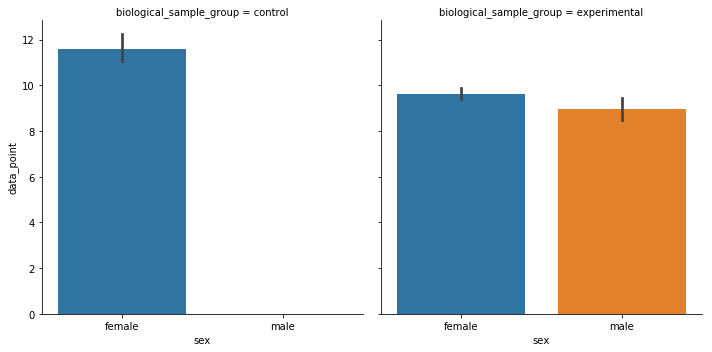

In [12]:
import seaborn as sns
x = df2['date_of_experiment']
y = df2['data_point']
sns.catplot(x = 'sex', y = 'data_point', col = 'biological_sample_group', kind = 'bar', data=df2)
plt.show()
